In [1]:
import numpy as np
from matplotlib import pyplot as plt


I am implementing value iteration and policy iteration algorithms as given in Chapter 4 of **'Reinforcement Learning: An Introduction' by Sutton and Barto.**
(Figure 4.3:Policy Iteration and Figure 4.5:Value Iteration)

In [2]:
##Initializing the states

grid_type = ['Normal', 'GreyIn', 'BrownIn', 'Goal']
##              0         1         2          3

Grid = np.zeros([10,10], dtype='uint8')
Grid[0][0] = 1
Grid[7][9] = 2
Grid[3][0] = 3 #Goal 1


print(np.flip(Grid.T, axis=0))
print(Grid[9, 9])

[[0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 3 0 0 0 0 0 0]]
0


In [3]:
## Implementing probablity function
## a is a string in 'up', 'down', 'left', 'right'

actions = ['up', 'down', 'left', 'right']

def p (s, a, sf):
  if grid_type[Grid[s[0]][s[1]]] == 'GreyIn':
    if sf[0] == 2 and sf[1] >= 3 and sf[1] <=7:
      return 1/4
    else:
      return 0
  elif grid_type[Grid[s[0]][s[1]]] == 'BrownIn':
    if sf == [7, 1]:
      return 1
    else:
      return 0
  elif grid_type[Grid[s[0]][s[1]]] == 'Goal':
    if sf == s:
      return 1
    else:
      return 0
  c = {}
  if (s[1] < 9):
    c['up'] = [s[0], s[1] + 1]
  else:
    c['up'] = [s[0], s[1]]
  if (s[1] > 0):
    c['down'] = [s[0], s[1]-1]
  else:
    c['down'] = [s[0], s[1]]
  if (s[0] < 9):
    c['right'] = [s[0]+1, s[1]]
  else:
    c['right'] = [s[0], s[1]]
  if (s[0] > 0):
    c['left'] = [s[0]-1, s[1]]
  else:
    c['left'] = [s[0], s[1]]

  p = 0
  for key, value in c.items():
    if sf == value and key == a:
      p += 0.8
    elif sf == value:
      p += 0.2/3
  
  return p  




In [4]:
## Sanity check for probability function

print (p ([0, 9], 'down', [0, 9]))


0.13333333333333333


I am modelling the problem as an infinite horizon problem such that the Goal state only has a transition to itself with probability 1.

Reaching the Goal state from any other state entails an Reward of +10 but reaching Goal from itself (after termination) would not not entail any rewards. (Although it wouldn't affect the policies since it would just mean scaling reward by 1/(1-alpha).

In [5]:


## Reward Function
def r (s, sf):
  if s != sf and grid_type[Grid[sf[0]][sf[1]]] == 'Goal':
    return 10
  else:
    return 0

## Sanity check for reward function
print(r([9,9],[9,9]))
print (r([3,4], [9,9]))

0
0


In [6]:
## Choose 3 random states for question 2b. 
random_states = {}
random_states[(5, 5)] = []
random_states[(7, 2)] = []
random_states[(2, 8)] = []
random_states[(9, 9)] = []
random_states[(1, 8)] = []
# random_states[(1, 4)] = []
# random_states[(3, 6)] = []
# random_states[(3, 0)] = []


random_statesPI = {}
random_statesPI[(5, 5)] = []
random_statesPI[(7, 2)] = []
random_statesPI[(2, 8)] = []
random_statesPI[(9, 9)] = []
random_statesPI[(1, 8)] = []
# random_statesPI[(1, 4)] = []
# random_statesPI[(3, 6)] = []
# random_statesPI[(3, 0)] = []


## Initializing policy with all 'up'.
piVI = {}
for i in range(10):
  for j in range(10):
    piVI[(i,j)] = 'up'


In the following cell, I am going to implement value iteration. I am implementing the **Gauss-Seidel method (Asynchronous value iteration)** since it is more natural to implement when we are not doing any parallel processing.

In [ ]:
## Value Iteration. I am using loops instead of matrices.

## Initializing v with zeros. 
v = np.zeros([10, 10])

alpha = 0.7

delta_history = []

# for l in range(5):  ###This for loop is there for 2(c)
while (True):
  delta = 0
  #Per state iteration
  for i in range(0, 10):
    for j in range(0, 10):
      prev_v = v[i, j]
      max_val = -183303 #-infty
      for a in actions:
        val = 0
        for k in range(0, 10):
          for l in range(0, 10):       
            val += p([i, j], a, [k, l])*(r([i, j],[k, l]) + alpha*v[k, l])
          
    
        if (val > max_val):
          max_val = val
          piVI[(i, j)] = a
          # print(a)

      
      v[i, j] = max_val
      if (i, j) in random_states.keys():
        random_states[(i, j)].append(max_val)


      delta = max(delta, abs(prev_v - max_val))
  
  print (delta)
  delta_history.append(delta)
  ## Obtaining pi* from the obtained v (or J).
  if (delta == 0):
    piStrVI = piVI
    break
      
        
piStrVI = piVI

8.417331626666666
6.543040797158186
3.799847563246603
2.60672418810078
1.9529894556256204
1.4405298127183146
0.9981456106883213
0.7239154320846257
0.5841961479362094
0.5997405348603131
0.628118639328541
0.6572394339944996
0.687560862397012
0.7192473427295667
0.7524003973844486
0.787085273468282
0.8233666074657862
0.861319699321804
0.9010221117505601
0.9425545772039392
0.9860014697834494
1.0314510382521114
1.0789955964225157
1.1287317127042655
1.1807604066609692
1.235187354290609
1.2921231026926705
1.3516832946105204
1.4139889033175663
1.4791664783285725
1.5473484024369455
1.6186731605996059
1.6933101346310124
1.7716969512545049
1.8536162108110972
1.9393182108355447
2.0289823321199734
2.1227920425589915
2.2209390292222935
2.3236238255973944
2.431056237803041
2.54345577172856
2.661052087723199
2.7840854547096043
2.9128072523708184
3.047480484173562
3.1883803154819077
3.3357946322362295
3.490024629901029
3.6513854301401807
3.8202067249442138
3.996833449441212
4.1816264862970485
4.37496340

In [ ]:
print(v)

In [ ]:

print (piStrVI)

In [ ]:
## Plot |J_i+1 - J_i|  vs iterations 
plt.plot (delta_history)
plt.show()

## Ploting the same on exponential scale.
plt.plot (np.log10(delta_history))
plt.show()



We can clearly see that the delta converges to 0 exponentially.

In [ ]:
## Initializing policy with all 'up'.
piPI = {}
for i in range(10):
  for j in range(10):
    piPI[(i,j)] = 'up'

## Maintaing pi_i+1 != pi_i history vector
diff_history = []

## Initializing v_PI (J) with all zeros.
v_PI = np.zeros([10, 10])

This cell will implement policy iteration. The policy evaluation is done using an asynchronous value iteration like scheme.

In [ ]:
## Policy iteration


# for l in range(4): ### This for loop is there for 2(d)
while(True):
  ## Policy Evaluation
  while (True):
    delta = 0
    #Per state iteration
    for i in range(0, 10):
      for j in range(0, 10):
        prev_v = v_PI[i, j]
        a = piPI [(i, j)]
        val = 0
        for k in range(0, 10):
          for l in range(0, 10):       
            val += p([i, j], a, [k, l])*(r([i, j],[k, l]) + alpha*v_PI[k, l])
          
        v_PI[i, j] = val
        delta = max(delta, abs(prev_v - val))
    
    #Ending Policy Evaluation Step  once J is found.
    if (delta < 1e-13):
      break


  ## Policy improvement
    
  diff = 0
  for i in range(0, 10):
    for j in range(0, 10):
      prev_action = piPI[(i,j)]
      max_val = -183303 #-infty
      for a in actions:
        val = 0
        for k in range(0, 10):
          for l in range(0, 10):       
            val += p([i, j], a, [k, l])*(r([i, j],[k, l]) + alpha*v_PI[k, l])
          
        if (val > max_val):
          max_val = val
          piPI[(i, j)] = a
      if (i, j) in random_statesPI.keys():
        random_statesPI[(i, j)].append(max_val)

         
    
      if (piPI[(i, j)] != prev_action):
        diff += 1
  diff_history.append(diff)
  print (diff)
  if (diff == 0):
    piStrPI = piPI
    break    


      
piStrPI = piPI



 As we can see that both policy iteration and value iteration give similar J* as should be expected. The are exactly the same because in both the cases I am terminating value iteration only when the delta is exactly zero.

In [ ]:

print(v_PI - v)

In [ ]:
print (piPI)

In [ ]:
## Policy iteration converges in 6 steps hence we don't have a sufficiently good curve. But we should have expected an exponential curve.
plt.plot(diff_history, label='Policy Iteration')

plt.show()


In [ ]:
## Simultaneous plots after scaling down to similar scales

plt.plot(diff_history, label='Policy Iteration')
plt.plot(delta_history, label='Value Iteration')
plt.legend()
plt.show()


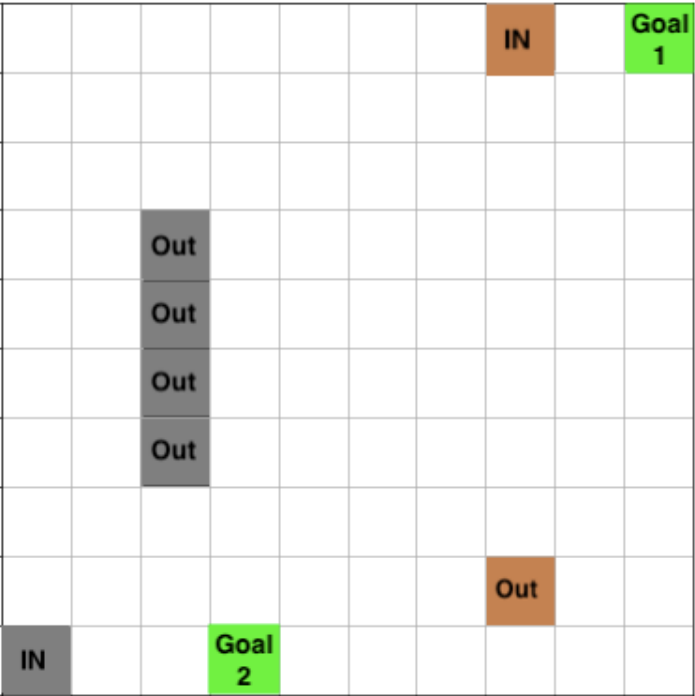

In [ ]:
!ls -a
# !conda install -c conda-forge opencv
import cv2
grIm = cv2.imread('grid.png')

In [ ]:
plt.imshow(grIm)
plt.show()

In [ ]:
[w, h, channels] = (np.shape(grIm))

In [ ]:
def draw_arrow(dirc, im, cellt):
    cell = [cellt[0], 9 - cellt[1]]
    
    if dirc == 'down':
        start_point = (cell[0]*w//10 + 30, cell[1]*h//10 + 7)  
        end_point = (cell[0]*w//10 + 30, cell[1]*h//10 + 53)
    if dirc == 'up':
        start_point = (cell[0]*w//10 + 30, cell[1]*h//10 + 53)  
        end_point = (cell[0]*w//10 + 30, cell[1]*h//10 + 7)
    if dirc == 'right':
        start_point = (cell[0]*w//10 + 7, cell[1]*h//10 + 30)  
        end_point = (cell[0]*w//10 + 53, cell[1]*h//10 + 30)
    if dirc == 'left':
        start_point = (cell[0]*w//10 + 53, cell[1]*h//10 + 30)  
        end_point = (cell[0]*w//10 + 7, cell[1]*h//10 + 30)
    
    
    color = (255, 0, 0)  
  
  
    thickness = 4
    return cv2.arrowedLine(im, start_point, end_point, color, thickness, tipLength = 0.5)  

In [ ]:
# ar = draw_arrow('right', grIm, (3, 7))
# plt.imshow(ar, aspect = 1)
# plt.show()

In [ ]:
# Policy for value iteration

grIm = cv2.imread('grid.png')
for key, val in piStrVI.items():
    grIm = draw_arrow(val, grIm, key)
plt.imshow(grIm)
cv2.imwrite('pi_VI.png', grIm)

plt.show()

In [ ]:
# Policy for policy iteration

grIm = cv2.imread('grid.png')
for key, val in piStrPI.items():
    grIm = draw_arrow(val, grIm, key)
plt.imshow(grIm)
cv2.imwrite('pi_PI.png', grIm)

plt.show()

In [ ]:
print (piStrPI == piStrVI)

In [ ]:
# Value 
for key, value in random_states.items():
    plt.plot(value)
# plt.show()





In [ ]:
#Policy

for key, value in random_statesPI.items():
    plt.plot(value)
plt.show()

In [ ]:
# Both
for key, value in random_states.items():
    plt.plot(value)
# plt.show()



for key, value in random_statesPI.items():
    plt.plot(value)
plt.show()

In [ ]:
# Function to inscribe J on the image.
def plot_J(im, J):
    for i in range(10):
        for j in range(10):
            a = i
            b = 9 - j
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(im,str(round(J[i][j], 1)),(a*w//10 + 7 , b*h//10 + 50 ), font, 1,(0,0,255),2,cv2.LINE_AA)

In [ ]:
grIm = cv2.imread('grid.png')

plot_J(grIm, v)
cv2.imwrite('J_VI.png', grIm)
plt.imshow(grIm)
plt.show()

In [ ]:
grIm = cv2.imread('grid.png')

plot_J(grIm, v_PI)
cv2.imwrite('J_PI.png', grIm)
plt.imshow(grIm)
plt.show()